In [26]:
import numpy as np
import arepo
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
basepath = '../../runs/'

In [3]:
sn = arepo.Snapshot(basepath + 'MW3_MHG0.35_GSE2/lvl4/output', 100, combineFiles=True)

In [5]:
sn.NumPart_Total[0] * 8 *8 + (sn.NumPart_Total[2]+sn.NumPart_Total[3]+sn.NumPart_Total[4]) * 7*8

79866192

In [6]:
import os
os.path.exists('frames/MW3_MHG0.35_GSE2-lvl4-rng_-80_80_-80_80_Tot_COM_nres256')

True

In [9]:
fout = 'MW3_MHG0.35_GSE2-lvl4-rng_-80_80_-80_80_Tot_COM_nres256'
snap = 0
f = h5.File('frames/'+fout+'/frame'+str(snap).zfill(3)+'.h5', mode='r')

In [15]:
f['Time'][()]

0.0

In [13]:
t

<HDF5 dataset "Time": shape (), type "<f8">

### Projection

In [15]:
from vortrace import vortrace as vt

In [1]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
snap = 347

In [5]:
sn = arepo.Snapshot(basepath + 'runs/MW3_MHG0.35_GSE2/lvl4/output', snap, combineFiles=True)

In [10]:
name = 'MW3_MHG0.25_GSE2-lvl4'
COM_fpath = basepath + 'anlys/COM/COM_' + name + '.npy'
COM_file = np.load(COM_fpath, allow_pickle=True).item()
COM = COM_file['Tot_COM'][snap]

In [12]:
pos = sn.part0.pos.value
rho = sn.part0.Density.value
BoxSize = sn.BoxSize

In [13]:
rng = [[-80, 80], [-80, 80]]
nres = 1024

In [17]:
extent_xy = [[COM[0] + rng[0][0], COM[0] + rng[0][1]], [COM[1] + rng[1][0], COM[1] + rng[1][1]]]
extent_xz = [[COM[0] + rng[0][0], COM[0] + rng[0][1]], [COM[2] + rng[1][0], COM[2] + rng[1][1]]]

bounds = [0., BoxSize]

In [18]:
pc = vt.ProjectionCloud(pos, rho, boundbox=[0., BoxSize, 0., BoxSize, 0., BoxSize])

Applying bounding box...
npart: 826360
Snapshot loaded.
Building tree...
Tree build took 133 milliseconds.


In [19]:
dat_xy = pc.projection(extent_xy, nres, bounds, COM, proj='xy')

Making projection...
Projection generation took 231221 milliseconds.


In [20]:
dat_xz = pc.projection(extent_xz, nres, bounds, COM, proj='xz')

Making projection...
Projection generation took 220188 milliseconds.


## check new projection

In [21]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [22]:
f = h5.File(basepath+'anlys/movie_smooth/frames/'
            +'MW3_MHG0.35_GSE2-lvl4-rng_-80_80_-80_80_Tot_COM_nres1024/frame347.h5', mode='r')

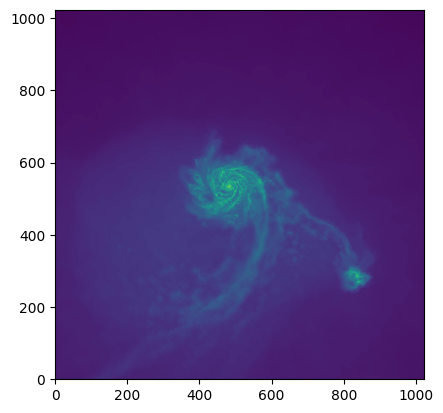

In [31]:
fig, ax = plt.subplots(1, 1)
Hxy_g = f['Hxy_g'][:]

ax.imshow(Hxy_g.T, origin='lower', norm=mpl.colors.LogNorm(vmin=1E-5, vmax=1E0))